In [ ]:
import matplotlib.pyplot as plt

from sklearn import linear_model
import pandas as pd
from sklearn import metrics 
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
param_grid=[
  {
      'penalty':['l1', 'l2', 'elasticnet', None],


  }
]
A = pd.read_csv("log2.csv")
X = A.values[:,[0,1,2,3,5,6,7,8,9,10,11]]
Y = A.values[:,4]
X, Xt, Y, Yt = train_test_split(X, Y, train_size=0.7, random_state=42)
cv = GridSearchCV(clf, param_grid=param_grid, cv = 10, n_jobs=-1,scoring='accuracy')
cv.fit(X,Y)
y_pred = cv.predict(Xt)
print(cv.best_params_)
print("accuracy: ", metrics.accuracy_score(Yt, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

{'penalty': 'l2'}
accuracy:  0.9792472024415056


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


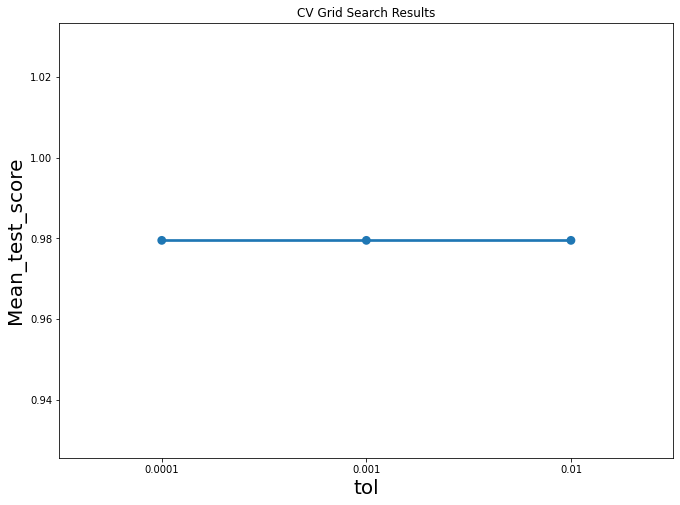

In [ ]:
fig = plot_cv_result(cv5.cv_results_, 'tol')

In [ ]:
param_grid=[
  {

      'class_weight':['balanced',None],


  }
]
cv2 = GridSearchCV(clf, param_grid=param_grid, cv = 10, n_jobs=-1,scoring='accuracy')
cv2.fit(X,Y)
y_pred = cv2.predict(Xt)
print(cv2.best_params_)
      

{'class_weight': None}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
param_grid=[
  {

      'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],


  }
]
cv3 = GridSearchCV(clf, param_grid=param_grid, cv = 10, n_jobs=-1,scoring='accuracy')
cv3.fit(X,Y)
y_pred = cv3.predict(Xt)
print(cv3.best_params_)
      

{'solver': 'newton-cg'}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


In [ ]:
param_grid=[
  {

      'max_iter':[100,200,500],


  }
]
cv4 = GridSearchCV(clf, param_grid=param_grid, cv = 10, n_jobs=-1,scoring='accuracy')
cv4.fit(X,Y)
y_pred = cv4.predict(Xt)
print(cv4.best_params_)
      

{'max_iter': 500}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
param_grid=[
  {

      'tol':[0.0001,0.001,0.01]

  }
]
cv5 = GridSearchCV(clf, param_grid=param_grid, cv = 10, n_jobs=-1,scoring='accuracy')
cv5.fit(X,Y)
y_pred = cv5.predict(Xt)
print(cv5.best_params_)
      

{'tol': 0.0001}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
import seaborn as sns


def plot_cv_results(cv_results, param_x, param_z, metric='mean_test_score'):
    cv_results = pd.DataFrame(cv_results)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("CV Grid Search Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel("Mean_test_score")
    ax.legend(title=param_z)
    return fig

def plot_cv_result(cv_results, param_x, metric='mean_test_score'):
    cv_results = pd.DataFrame(cv_results)
    col_x = 'param_' + param_x
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x,  y=metric, hue=None, data=cv_results, ci=99, n_boot=64, ax=ax, fontsize=50)
    ax.set_title("CV Grid Search Results")
    ax.set_xlabel(param_x, fontsize=20)
    ax.set_ylabel("Mean_test_score", fontsize=20)
    
   
    return fig

In [ ]:
clf = LogisticRegression(solver='newton-cg',class_weight = 'balanced', penalty='l2',max_iter=500,tol=0.0001)
clf.fit(X,Y)


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


LogisticRegression(class_weight='balanced', max_iter=500, solver='newton-cg')

In [ ]:
ypred = clf.predict(Xt)
print("accuracy: ", metrics.accuracy_score(Yt, ypred))

accuracy:  0.9578331637843337


In [ ]:
B = A
B.drop(['Action'], axis='columns', inplace=True)

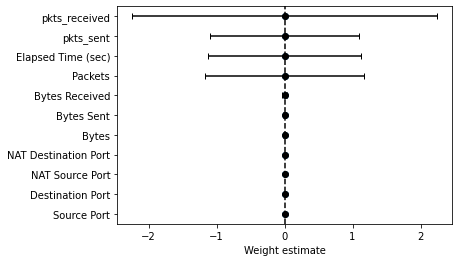

In [ ]:
import numpy as np
features = [[],[],[],[],[],[],[],[],[],[],[]]
for i in range(clf.coef_.shape[0]):
  for j in range(len(clf.coef_[i])):
      features[j].append(clf.coef_[i][j])

means = []
errors = []
for i in features:
  a = np.array(i)
  means.append(np.mean(a))
  errors.append(np.std(a))
  
plt.scatter(means,B.columns)
plt.errorbar(means, B.columns, xerr = errors,fmt = 'o',color='black', capsize=3)
plt.axvline(x=0, color='k', linestyle='--')
plt.xlabel('Weight estimate')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
target_names = ['allow', 'deny', 'drop','reset-both']
print(classification_report(Yt, ypred, target_names=target_names,digits=5))



              precision    recall  f1-score   support

       allow    0.99982   0.99515   0.99748     11330
        deny    0.99758   0.82854   0.90524      4485
        drop    0.96280   1.00000   0.98105      3830
  reset-both    0.01471   0.66667   0.02878        15

    accuracy                        0.95783     19660
   macro avg    0.74373   0.87259   0.72813     19660
weighted avg    0.99135   0.95783   0.97250     19660

